# Kelly Criterion
Its a program simulating gambling different amounts to learn, using kelly criterion as the method of estimating win probability over a time period and then plotting it against other kelly strategies and the 'optimal' perfect strategy in python. Part 1: find the optimal fraction of kelly. Since full kelly is often too aggressive, different fractions of the original kelly formula will be simulated and benchmarked. These results will be graphed and analyzed. Part 2: From this, the optimal fractions will be selected and they will be set as the optimal, and will be known as the benchmark for 'blind fractional kelly' to try and reach. Different beta prior parameters will be tested and simulated to observe which one is the best, and then from there I will determine which is the best. There'll also be a write-up like a research paper where I talk about the procedure and conclusions.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from colorama import Fore, Back, Style

In [2]:
def full_kelly(num_tries, bankroll, seed): # mathematically optimal, bad in practice
    np.random.seed(seed)

    # hard-coded (for now) probabilities and odds
    win_prob = 0.55
    win_odds = 1.5

    values = []
    total_money_lost = 0
    for x in range(num_tries):
        if bankroll > 0:
            rand = np.random.rand()
            amount_to_bet = (((win_odds * win_prob) - (1 - win_prob)) / win_odds) * bankroll # only bets a fraction of original amount
            if amount_to_bet > 0:
                if rand < win_prob:
                    bankroll += amount_to_bet
                else:
                    bankroll -= amount_to_bet
                    total_money_lost += amount_to_bet
                values.append(bankroll)
            else:
                print('No edge. Will not bet.')
                break
        else:
            print(f'Bankrupt after {x} rounds')
            break

    values = np.array(values)
    # print(Fore.BLUE + 'Final kelly bankroll: ', bankroll)
    # print('Total kelly lost: ', total_money_lost)
    # print('Standard Deviation: ', values.std())
    # print('Mean: ', values.mean())
    # print(Style.RESET_ALL)

    return values

In [3]:
def fractional_kelly(num_tries, bankroll, prob, fraction, seed): # used as benchmark due to superior survivability and growth consistency
    np.random.seed(seed)
    
    # hard-coded (for now) probabilities and odds
    win_prob = prob
    win_odds = 1.5

    values = []
    total_money_lost = 0
    for x in range(num_tries):
        if bankroll > 0:
            rand = np.random.rand()
            amount_to_bet = (((win_odds * win_prob) - (1 - win_prob)) / win_odds) * bankroll * fraction # kelly criterion
            if amount_to_bet > 0:
                if rand < win_prob:
                    bankroll += amount_to_bet
                else:
                    bankroll -= amount_to_bet
                    total_money_lost += amount_to_bet
                values.append(bankroll)
            else:
                print('No edge. Will not bet.')
                break
        else:
            print(f'Bankrupt after {x} rounds')
            break

    values = np.array(values)
    # print(Fore.RED + f'Final {fraction:.1f} fractional kelly bankroll with prob {prob:.2}: ', bankroll)
    # print('Total fractional kelly lost: ', total_money_lost)
    # print('Standard Deviation: ', values.std())
    # print('Mean: ', values.mean())
    # print(Style.RESET_ALL)

    return values

In [4]:
def find_mean(counter_dict):
    mean_frac = 0
    total_freq = 0
    for key in counter_dict.keys():
        count = counter_dict[key]
        total_freq += count
        mean_frac += key * count
    mean_frac /= total_freq
    return mean_frac

In [5]:
def find_median(counter_dict):
    total_freq = 0
    median_index_1 = 0
    median_index_2 = 0
    median = 0
    even = False
    for key in counter_dict.keys():
        count = counter_dict[key]
        total_freq += count

    median_index_1 = int (total_freq / 2) + 1
    
    if total_freq % 2 == 0:
        even = True
        median_index_2 = int ((total_freq) / 2)
    
    total_freq = 0
    for key in counter_dict.keys():
        count = counter_dict[key]
        total_freq += count
        if total_freq >= median_index_1:
            median = key
            break
    
    if even:
        total_freq = 0
        for key in counter_dict.keys():
            count = counter_dict[key]
            total_freq += count
            if total_freq >= median_index_2:
                median += key
                break
        median = median / 2
        
    return median

In [6]:
def find_mode(counter_dict):
    max_freq = 0
    mode_fractions = []
    for key in counter_dict.keys():
        count = counter_dict[key]
        if count > max_freq:
            max_freq = count

    for key in counter_dict.keys():
        count = counter_dict[key]
        if count == max_freq:
            mode_fractions.append(key)

    return mode_fractions

In [7]:
dicts = {
    0.1: 3,
    0.2: 5,
    0.3: 5,
    0.4: 5
}

print(find_mean(dicts))
print(find_median(dicts))
print(find_mode(dicts))

0.26666666666666666
0.3
[0.2, 0.3, 0.4]


i use different seeds for more variability. this is something i thought of, that if its the same seed then all strats will win or lose at the same time, and the more volatile ones (e.g. 0.8 and 0.9) will fail or grow quicker.to remove that i make it different for all simulations, but still keeping it set so i can keep the reproducibility. at least that was my thinking. seed = int(seed * frac * prob * 100)

UPDATE: After careful consideration, I have decided to calculate seed only using the seed number in the *seeds* list. This is because I had set the seeds to be different for every simulation, making it so that the simulations' comparisons of optimal fractions would be invalid, as the simulation data could be skewed by the seed choice. Now, by using only the seed numbers from *seeds*, fractional comparisons will be valid and not skewed by seed number, making the graphs comparing best ending bankrolls more statistically sound. seed = curr_seed

ADVICE FROM PROF: Since I need to decide which fractions are the best, I need to start by finding modes from the multimodal discrete value bar graph.
Steps:
1. Remove mean and median from best fraction calculation (data is discrete not continuous, and heavily skewed - cannot use these).
2. Decide what should be the minimum threshold to decide that these values are significant, and the rest arent
    * like if theres 3 real high columns, those will be the best, but if its mostly flat (each fraction has an equal-ish chance) then theres no definite best fraction

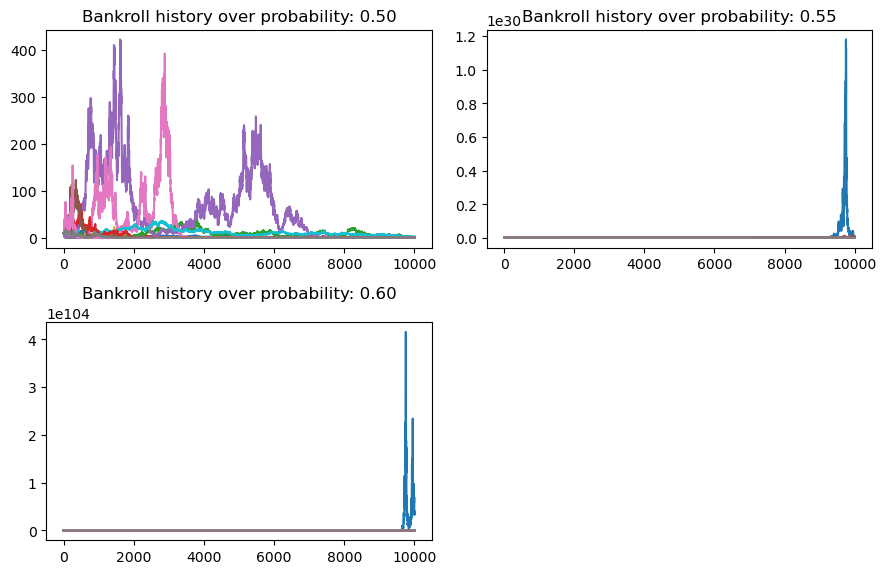

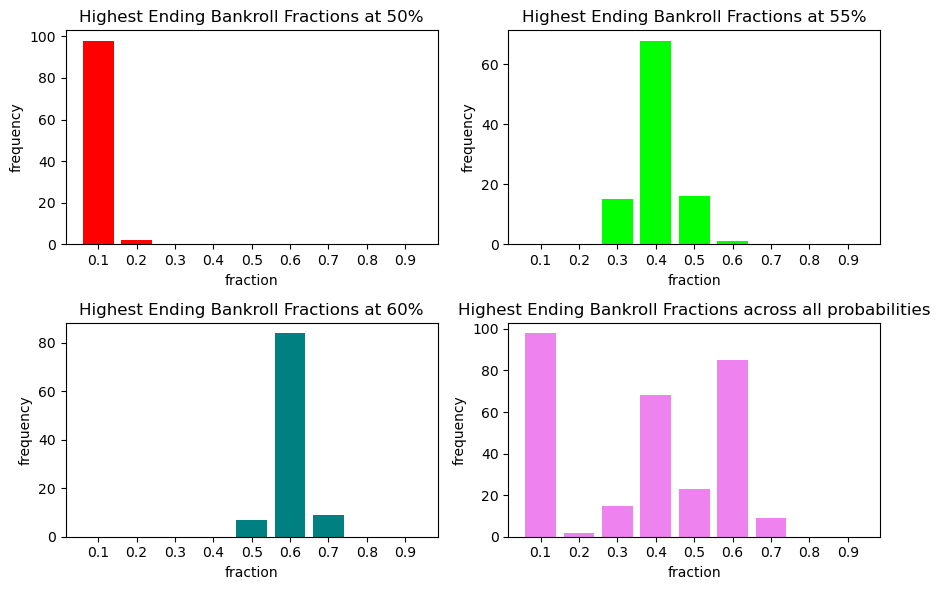

Execution time: 30.94 seconds


In [8]:
import math
import time
import importlib
import Plotting_functions
importlib.reload(Plotting_functions)

num_tries = int(input('How many times would you like to run the simulation? '))

bankroll = float(input('How much money is in your bankroll? '))
print()

start_time = time.time()

# all values being iterated over
all_values = []
fractions = np.arange(0.1, 1.0, 0.1) # sicne repeated, make this into an input and give a default value
probabilities = np.arange(0.5, 0.601, 0.05)
seeds = list(range(1, 101))
plot_num = 1
plot_every_nth = 0
plt.figure(figsize=(9, 6))

for prob in probabilities:
    plt.subplot(2, 2, plot_num)
    plt.title(f'Bankroll history over probability: {prob:.2f}')
    plot_num += 1
    for seed in seeds: # Myabe pick seeds at random using a unifrom distribution rather than sequential seeds for less bias.
        values = [] # contains all variables of a single simulation.
        for frac in fractions:
            curr_seed = seed       
            fractional = fractional_kelly(num_tries, bankroll, prob, frac, curr_seed) 
            # seed is ever-changing but constant for all probabilities: mimics one person doing 3 different experimental groups
            values.append({
                'seed': seed,
                'fraction': frac,
                'probability': prob,
                'bankroll history': fractional})
            if plot_every_nth % 50 == 0: # plot only every few simulations for better performance and visibility
                plt.plot(fractional, label=f'{frac:.1}')
            plot_every_nth += 1
        all_values.append(values)
plt.tight_layout()

# dictionaries to keep track of the frequency of each fraction returning the highest final bankroll
max_counter_50 = {x: 0 for x in np.arange(0.1, 1.0, 0.1)}
max_counter_55 = {x: 0 for x in np.arange(0.1, 1.0, 0.1)}
max_counter_60 = {x: 0 for x in np.arange(0.1, 1.0, 0.1)}
max_counter = {x: 0 for x in np.arange(0.1, 1.0, 0.1)} # total across all probabilities

for values in all_values: # adding all simulations to bar graph and plotting
    finals = []
    count = 1 # used to keep track of which probability the loop is currently on
    for entry in values: # loops through each bankroll 
        final_val = entry['bankroll history'][-1]
        finals.append(final_val)
    
    finals = np.array(finals)
    prob = values[0]['probability']
    best_frac = fractions[np.argmax(finals)]

    if math.isclose(prob, 0.5):
        max_counter_50[best_frac] += 1
    elif math.isclose(prob, 0.55):
        max_counter_55[best_frac] += 1
    elif math.isclose(prob, 0.6):
        max_counter_60[best_frac] += 1
    max_counter[best_frac] += 1 # adding final bankrolls to plot across all probabilities
plt.show()

plt.figure(figsize=(9, 6)) # plotting function in a .py file
plt.subplot(2,2,1)
plt.bar([str(f'{max_val:.2}') for max_val in max_counter_50.keys()], list(max_counter_50.values()), color='red')
plt.title('Highest Ending Bankroll Fractions at 50%')
plt.xlabel('fraction')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.bar([str(f'{max_val:.2}') for max_val in max_counter_55.keys()], list(max_counter_55.values()), color='lime')
plt.title('Highest Ending Bankroll Fractions at 55%')
plt.xlabel('fraction')
plt.ylabel('frequency')

plt.subplot(2,2,3)
plt.bar([str(f'{max_val:.2}') for max_val in max_counter_60.keys()], list(max_counter_60.values()), color='teal')
plt.title('Highest Ending Bankroll Fractions at 60%')
plt.xlabel('fraction')
plt.ylabel('frequency')

plt.subplot(2,2,4)
plt.bar([str(f'{max_val:.2}') for max_val in max_counter.keys()], list(max_counter.values()), color='violet')
plt.title('Highest Ending Bankroll Fractions across all probabilities')
plt.xlabel('fraction')
plt.ylabel('frequency')
plt.tight_layout()
plt.show() # plotting all maxes across all probabilities on a bar graph

# mean_frac = find_mean(max_counter) # No 
# median_frac = find_median(max_counter)
mode_frac = find_mode(max_counter)
# print('mean:', mean_frac)
# print('median: ', median_frac)
# print('mode: ', mode_frac)

end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

### Probability 0.50
Most optimal fractions: [0.1]
### Probability 0.55
Most optimal fractions: [0.4]
### Probability 0.55
Most optimal fractions: [0.6]

mean: 0.369
median:  0.4
mode:  [0.1]
Execution time: 23.17 seconds



In [11]:
def blind_kelly(num_tries, uncertain_bankroll, seed):
    np.random.seed(seed)

    # hard-coded (for now) probabilities and odds
    win_prob = 0.55
    win_odds = 1.5
    
    # Kelly with Parameter Uncertainty
    total_wins = 0
    total_losses = 0
    estimated_win_prob = 0.5 # initial estimated probability
    total_uncertain_money_lost = 0
    values = []
    
    prior_wins_estimate = 4
    prior_losses_estimate = 4
    for x in range(num_tries):
        if uncertain_bankroll > 0:
            rand = np.random.rand()
            amount_to_bet = (((win_odds * estimated_win_prob) - (1 - estimated_win_prob)) / win_odds) * uncertain_bankroll
            if amount_to_bet > 0:
                if rand < win_prob: # actual win/loss. Uses true win_prob to model a set probability by a casino
                    uncertain_bankroll += amount_to_bet
                    total_wins += 1
                else:
                    uncertain_bankroll -= amount_to_bet
                    total_losses += 1
                    total_uncertain_money_lost += amount_to_bet
                estimated_win_prob = ( # bayesian updating to predict true win probability
                    total_wins + prior_wins_estimate
                    ) / (
                    (total_wins + prior_wins_estimate) + (total_losses + prior_losses_estimate)
                    )
                values.append(uncertain_bankroll)
            else:
                print(f'No edge. Will not bet. {x}')
                break
        else:
            print(f'Bankrupt after {x} rounds')
            break

    values = np.array(values) # change to np.asarray()
    # print(Fore.GREEN + 'Final estimated kelly bankroll: ', uncertain_bankroll)
    # print('Total estimated kelly lost: ', total_uncertain_money_lost)
    # print('Standard Deviation: ', values.std())
    # print('Mean: ', values.mean())
    # print(Style.RESET_ALL)

    return values

In [12]:
def bayesian_updating(prior_wins_estimate, prior_losses_estimate, total_wins, total_losses):
    return (
        total_wins + prior_wins_estimate
        ) / (
        (total_wins + prior_wins_estimate) + (total_losses + prior_losses_estimate)
        )

In [13]:
def blind_fractional_kelly(num_tries, uncertain_bankroll, fraction, seed): # legacy code - currently being replaced
    np.random.seed(seed)

    # hard-coded (for now) probabilities and odds
    win_prob = 0.55
    win_odds = 1.5
    
    # Kelly with Parameter Uncertainty
    total_wins = 0
    total_losses = 0
    estimated_win_prob = 0.5 # initial estimated probability
    total_uncertain_money_lost = 0
    values = []
    
    prior_wins_estimate = 4
    prior_losses_estimate = 4
    for x in range(num_tries):
        if uncertain_bankroll > 0:
            rand = np.random.rand()
            amount_to_bet = (((win_odds * estimated_win_prob) - (1 - estimated_win_prob)) / win_odds) * uncertain_bankroll * fraction
            if amount_to_bet > 0:
                if rand < win_prob: # actual win/loss. Uses true win_prob to model a set probability by a casino
                    uncertain_bankroll += amount_to_bet
                    total_wins += 1
                else:
                    uncertain_bankroll -= amount_to_bet
                    total_losses += 1
                    total_uncertain_money_lost += amount_to_bet
                estimated_win_prob = ( # bayesian updating to predict true win probability
                    total_wins + prior_wins_estimate
                    ) / (
                    (total_wins + prior_wins_estimate) + (total_losses + prior_losses_estimate)
                    )
                values.append(uncertain_bankroll)
            else:
                print(f'No edge. Will not bet. {x}')
                break
        else:
            print(f'Bankrupt after {x} rounds')
            break

    values = np.array(values)
    # print(Fore.YELLOW + f'Final fractional estimated kelly bankroll {fraction:.1f}: ', uncertain_bankroll)
    # print('Total fractional estimated kelly lost: ', total_uncertain_money_lost)
    # print('Standard Deviation: ', values.std())
    # print('Mean: ', values.mean())
    # print(Style.RESET_ALL)
    
    return values

In [14]:
def ALTERED_blind_fractional_kelly(num_tries, bankroll, prob, fraction, seed, prior_wins, prior_losses):
    np.random.seed(seed)

    # hard-coded (for now) probabilities and odds
    win_prob = prob
    win_odds = 1.5
    
    # Kelly with Parameter Uncertainty
    total_wins = 0
    total_losses = 0
    estimated_win_prob = 0.5 # initial estimated probability
    total_uncertain_money_lost = 0
    values = []
    
    prior_wins_estimate = prior_wins
    prior_losses_estimate = prior_losses
    for x in range(num_tries):
        if not math.isclose(bankroll, 0):
            rand = np.random.rand()
            amount_to_bet = (((win_odds * estimated_win_prob) - (1 - estimated_win_prob)) / win_odds) * bankroll * fraction
            if amount_to_bet <= 0: # continues updating the wins/losses to approximate true win_prob
                amount_to_bet = 0 # will start betting once the approximated win prob is adequate
                
            if rand < win_prob: # actual win/loss. Uses true win_prob to model a set probability by a casino
                bankroll += amount_to_bet
                total_wins += 1
            else:
                bankroll -= amount_to_bet
                total_losses += 1
                total_uncertain_money_lost += amount_to_bet
            estimated_win_prob = bayesian_updating(
                prior_wins_estimate, prior_losses_estimate, total_wins, total_losses
            ) # bayesian updating to predict true win probability
            values.append(bankroll)
        else:
            print(f'Bankrupt after {x} rounds')
            break

    values = np.array(values)
    # print(Fore.YELLOW + f'Final fractional estimated kelly bankroll {fraction:.1f}: ', bankroll)
    # print('Total fractional estimated kelly lost: ', total_uncertain_money_lost)
    # print('Standard Deviation: ', values.std())
    # print('Mean: ', values.mean())
    # print(Style.RESET_ALL)
    
    return values

IndexError: tuple index out of range

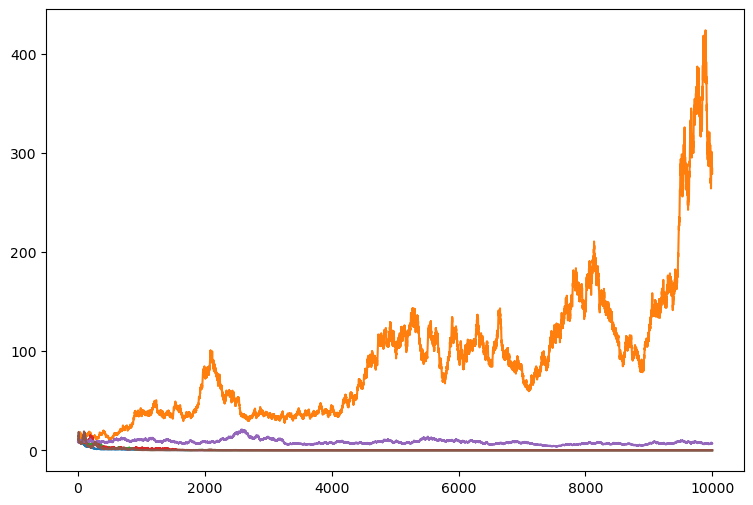

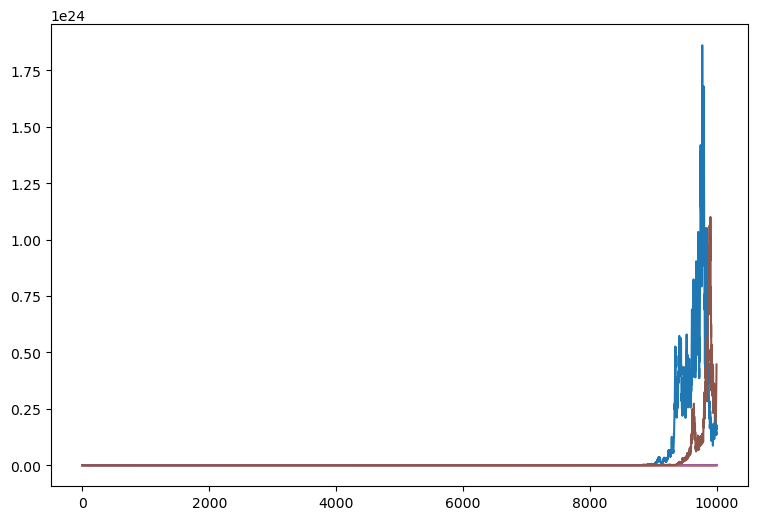

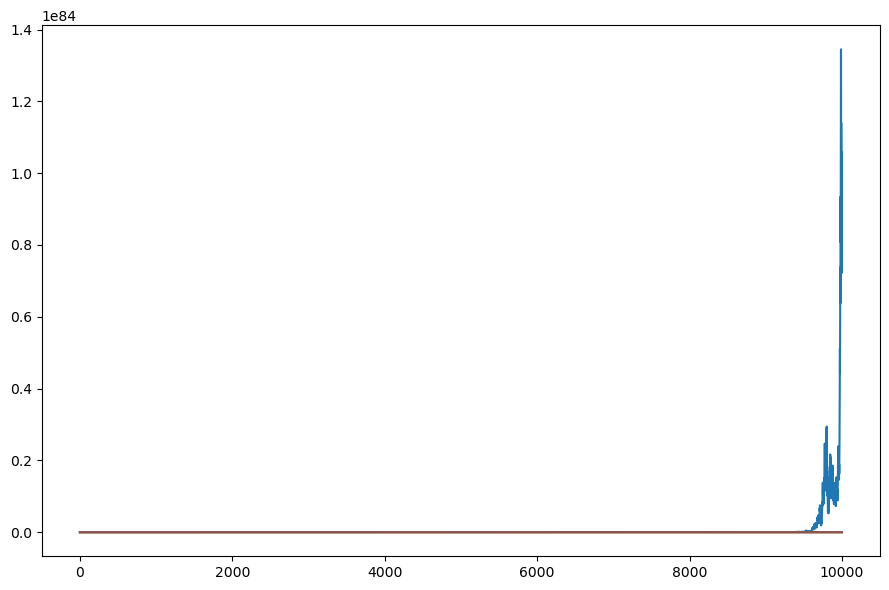

In [ ]:
import time

start_time = time.time()

beta_priors = (
(5,10), # extreme confidence, pessimistic
(1,1), # low confidence, balanced
# [2,2], # control validation, will test through ~5 seeds to verify closeness to B(1,1).
(1,3), # low confidence, somewhat pessimistic
(2,6), # medium confidence, pessimistic
(5,5), # medium confidence, balanced
(6,2), # medium confidence, optimistic
(10,1), # medium-high confidence, optimistic
(10,8), # high confidence, somewhat optimistic
# [9,9], # control validation, will test through ~5 seeds to verify closeness to B(10,10).
(10,10), # high confidence, balanced
(20, 5) # extreme confidence, optimistic
)

chosen_mode = mode_frac[0]

fracs = [chosen_mode]

# for frac in fracs:
#     for other_frac in fracs:
#     if frac

# if mean_frac math.isclose(mean_frac, 

# all values being iterated over
all_blind_values = []
plot_every_nth = 0

# Simulations
for prob in probabilities:
    plt.figure(figsize=(9, 6))
    for seed in range(1,11):
        values = []
        for prior in beta_priors:
            for frac in fracs:
                blind_frac = ALTERED_blind_fractional_kelly(num_tries, bankroll, prob, frac, seed, prior[0], prior[1])
                values.append({
                'seed': seed,
                'prior': prior,
                'fraction': frac,
                'probability': prob,
                'bankroll history': blind_frac})
                if plot_every_nth % 50 == 0: # plot only every few simulations for better performance and visibility
                    plt.plot(blind_frac, label=f'{frac:.1}')
                plot_every_nth += 1
        all_values.append(values)
plt.tight_layout()

# Finding best priors for each probability
max_prior_50 = {x: 0 for x in beta_priors}
max_prior_55 = {x: 0 for x in beta_priors}
max_prior_60 = {x: 0 for x in beta_priors}
max_prior = {x: 0 for x in beta_priors}

for values in all_values:
    finals = []
    count = 1 # used to keep track of which probability the loop is currently on
    for entry in values: # loops through each bankroll 
        final_val = entry['bankroll history'][-1]
        finals.append(final_val)
    
    finals = np.array(finals)
    prob = values[0]['probability']
    best_prior = beta_priors[np.argmax(finals)]

    if math.isclose(prob, 0.5):
        max_prior_50[best_prior] += 1
    elif math.isclose(prob, 0.55):
        max_prior_55[best_prior] += 1
    elif math.isclose(prob, 0.6):
        max_prior_60[best_prior] += 1
    max_prior[best_prior] += 1 # adding final bankrolls to plot across all probabilities
plt.show()


plt.figure(figsize=(9, 6))
plt.subplot(2,2,1)
plt.bar([str(f'{max_val:.2}') for max_val in max_prior_50.keys()], list(max_prior_50.values()), color='red')
plt.title('Highest Ending Bankroll Fractions at 50%')
plt.xlabel('fraction')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.bar([str(f'{max_val:.2}') for max_val in max_prior_55.keys()], list(max_prior_55.values()), color='lime')
plt.title('Highest Ending Bankroll Fractions at 55%')
plt.xlabel('fraction')
plt.ylabel('frequency')

plt.subplot(2,2,3)
plt.bar([str(f'{max_val:.2}') for max_val in max_prior_60.keys()], list(max_prior_60.values()), color='teal')
plt.title('Highest Ending Bankroll Fractions at 60%')
plt.xlabel('fraction')
plt.ylabel('frequency')

plt.subplot(2,2,4)
plt.bar([str(f'{max_val:.2}') for max_val in max_prior.keys()], list(max_prior.values()), color='violet')
plt.title('Highest Ending Bankroll Fractions across all probabilities')
plt.xlabel('fraction')
plt.ylabel('frequency')
plt.tight_layout()
plt.show() # plotting all maxes across all probabilities on a bar graph

end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

In [ ]:
beta_priors = (
(5,10), # extreme confidence, pessimistic
(1,1), # low confidence, balanced
# [2,2], # control validation, will test through ~5 seeds to verify closeness to B(1,1).
(1,3), # low confidence, somewhat pessimistic
(2,6), # medium confidence, pessimistic
(5,5), # medium confidence, balanced
(6,2), # medium confidence, optimistic
(10,1), # medium-high confidence, optimistic
(10,8), # high confidence, somewhat optimistic
# [9,9], # control validation, will test through ~5 seeds to verify closeness to B(10,10).
(10,10), # high confidence, balanced
(20, 5) # extreme confidence, optimistic
)

max_prior_50 = {x: 0 for x in beta_priors}
max_prior_55 = {x: 0 for x in beta_priors}
max_prior_60 = {x: 0 for x in beta_priors}
max_prior = {x: 0 for x in beta_priors}

for values in all_values:
    finals = []
    count = 1 # used to keep track of which probability the loop is currently on
    for entry in values: # loops through each bankroll 
        final_val = entry['bankroll history'][-1]
        finals.append(final_val)
    
    finals = np.array(finals)
    prob = values[0]['probability']
    best_prior = beta_priors[np.argmax(finals)]

    if math.isclose(prob, 0.5):
        max_prior_50[best_prior] += 1
    elif math.isclose(prob, 0.55):
        max_prior_55[best_prior] += 1
    elif math.isclose(prob, 0.6):
        max_prior_60[best_prior] += 1
    max_prior[best_frac] += 1 # adding final bankrolls to plot across all probabilities

How many times would you like to run the simulation?  10000
How much money is in your bankroll?  10



No edge. Will not bet. 5
No edge. Will not bet. 5
No edge. Will not bet. 3
No edge. Will not bet. 3
No edge. Will not bet. 5
No edge. Will not bet. 5
No edge. Will not bet. 8
No edge. Will not bet. 8
No edge. Will not bet. 3
No edge. Will not bet. 3
No edge. Will not bet. 3
No edge. Will not bet. 3


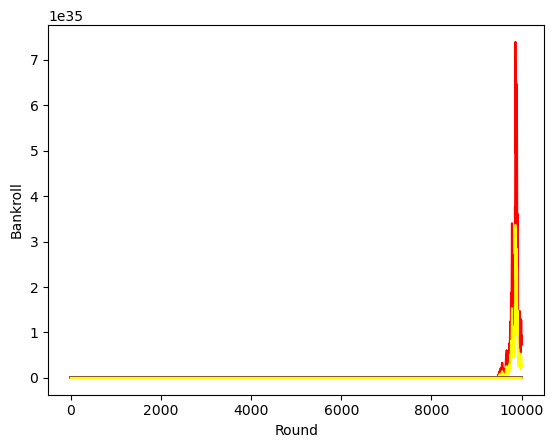

No edge. Will not bet. 10
No edge. Will not bet. 10
No edge. Will not bet. 5
No edge. Will not bet. 5
No edge. Will not bet. 3
No edge. Will not bet. 3
No edge. Will not bet. 15
No edge. Will not bet. 15
No edge. Will not bet. 5
No edge. Will not bet. 5
No edge. Will not bet. 20
No edge. Will not bet. 20


/var/folders/_8/zh8sf2z52c738rdw5xv8jvsh0000gp/T/ipykernel_90798/388632048.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


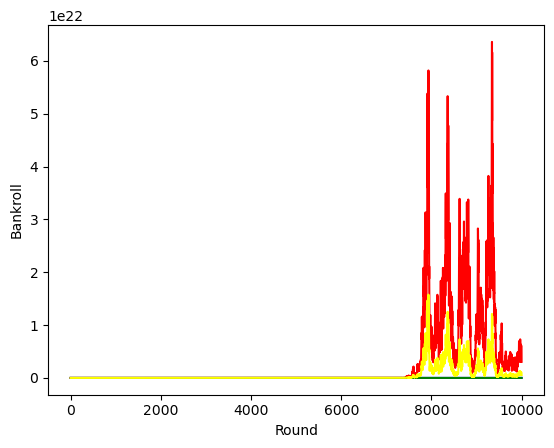

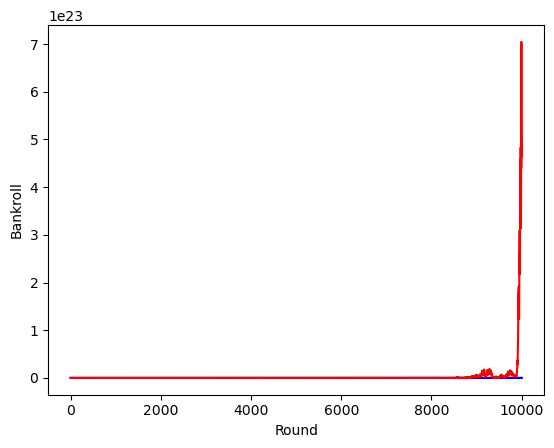

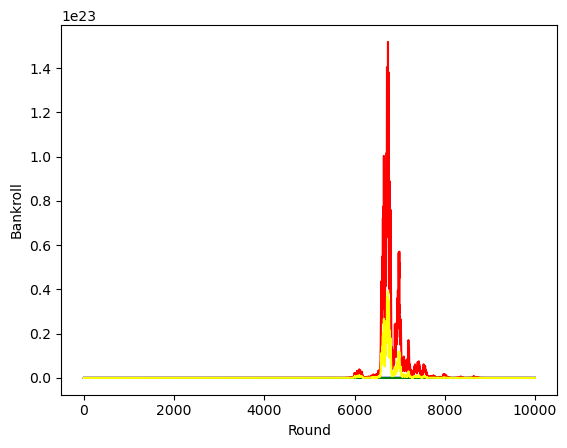

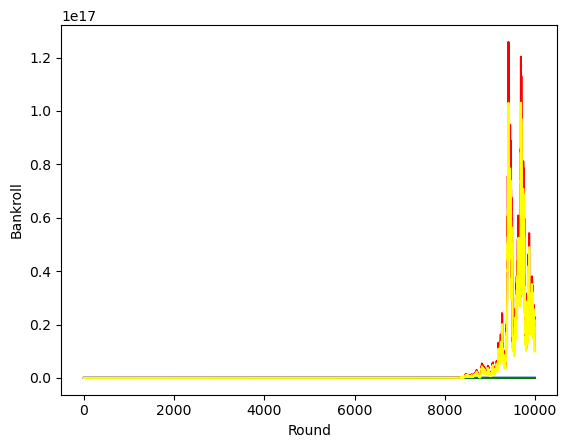

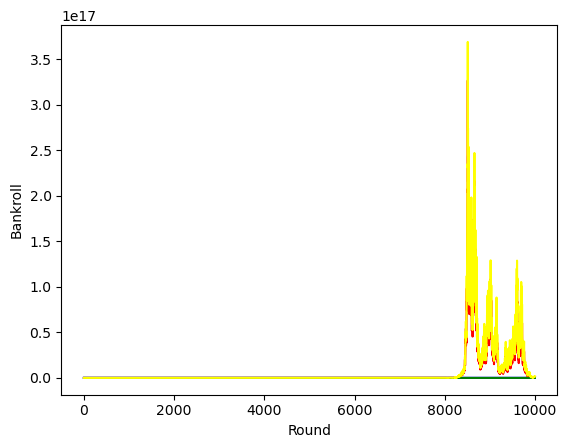

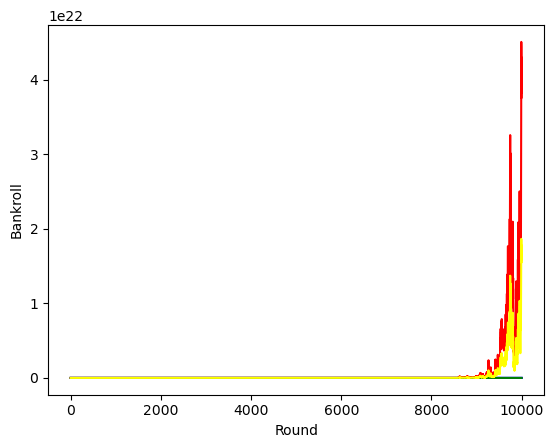

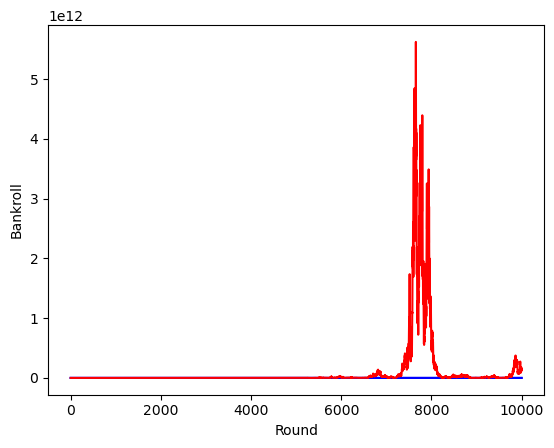

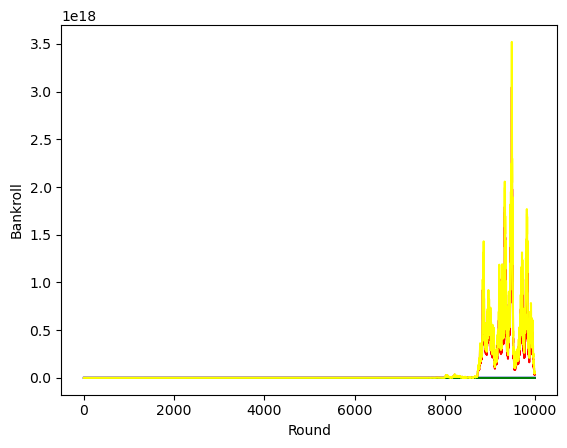

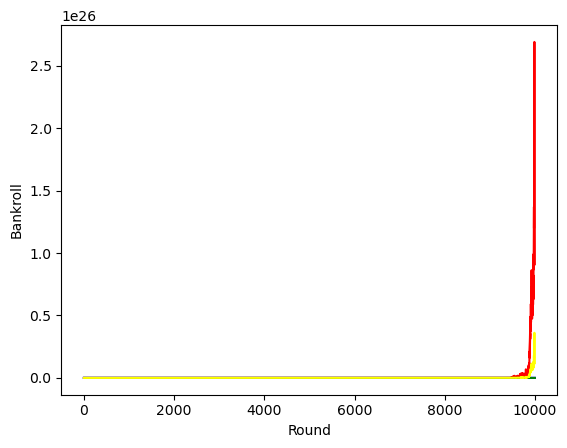

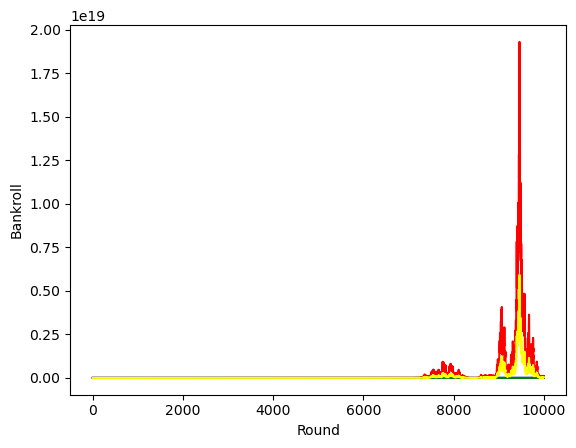

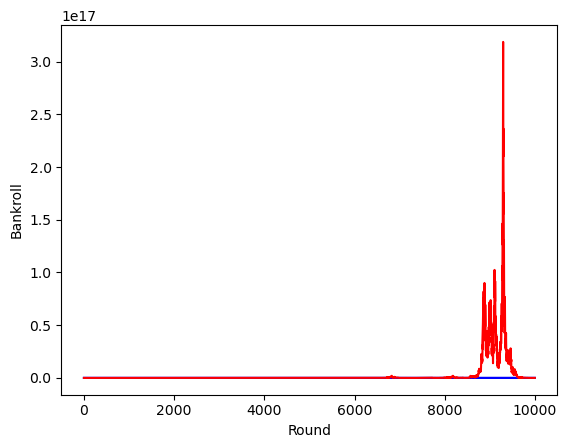

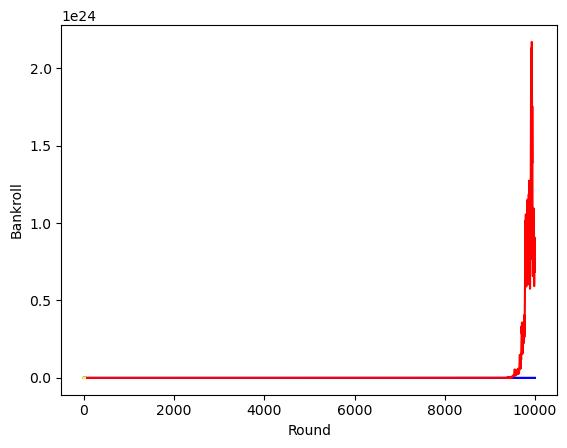

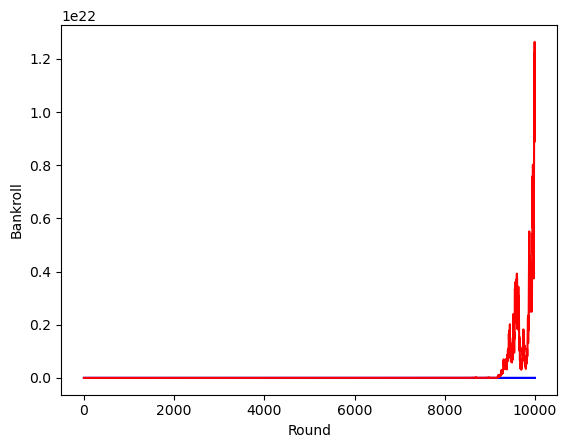

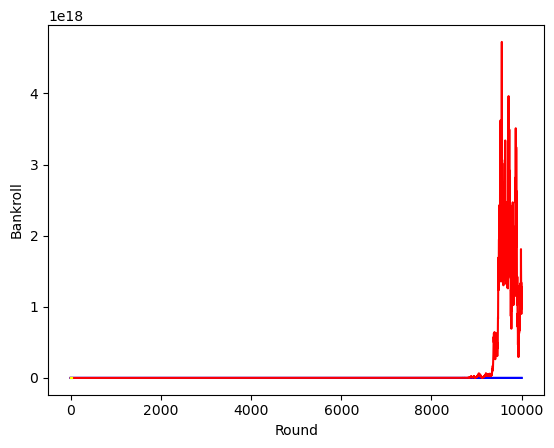

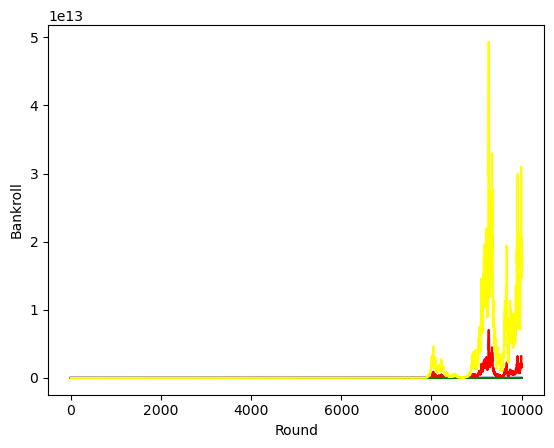

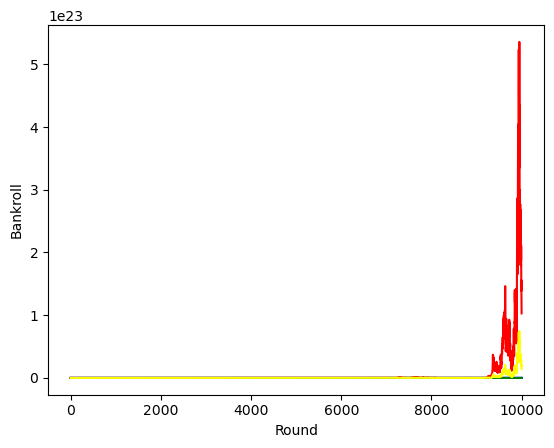

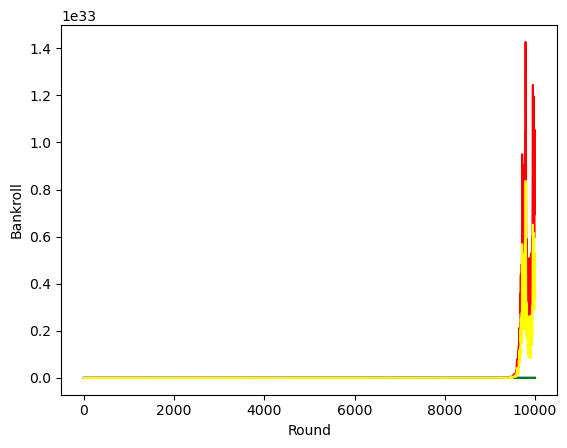

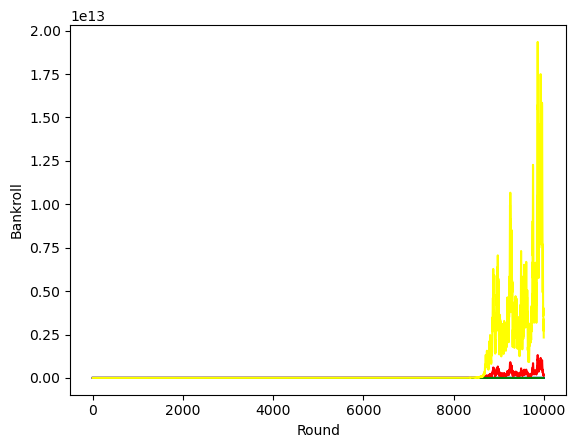

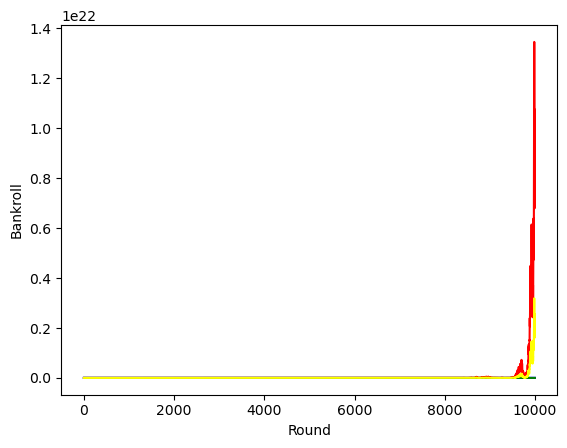

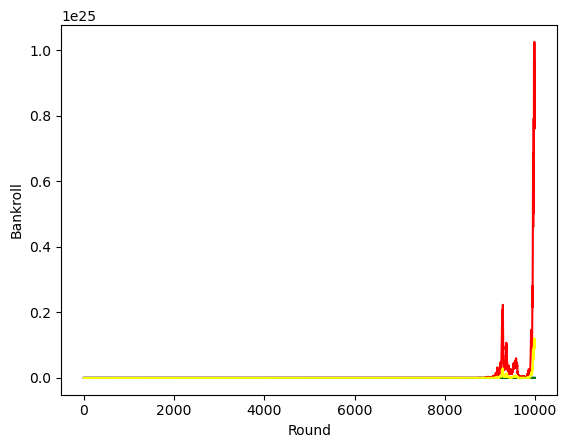

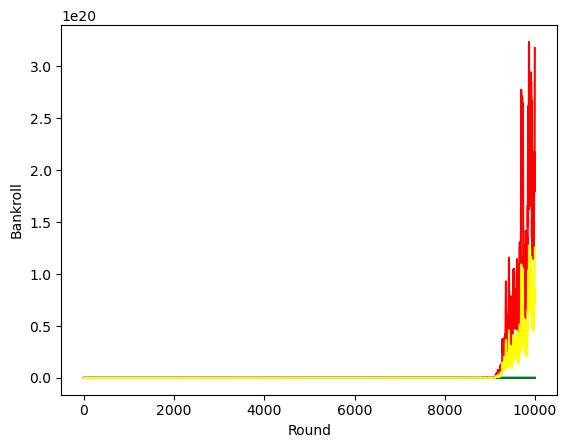

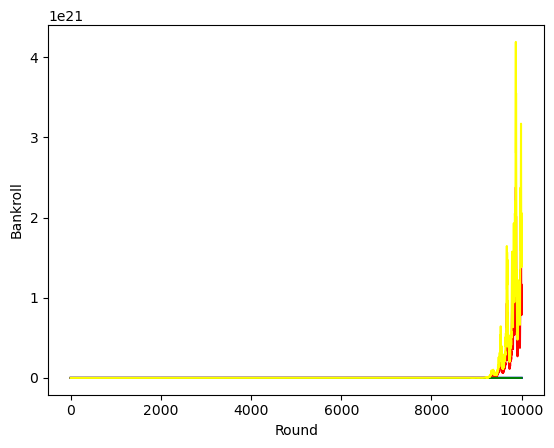

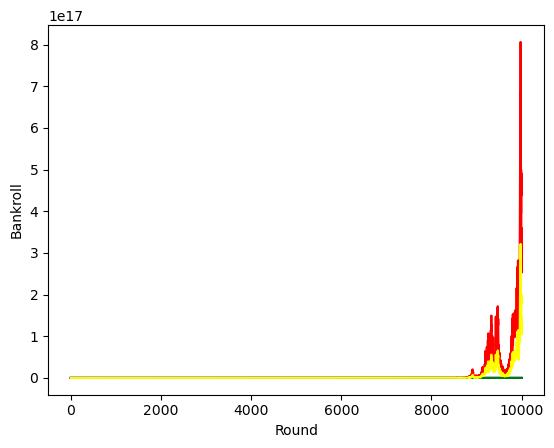

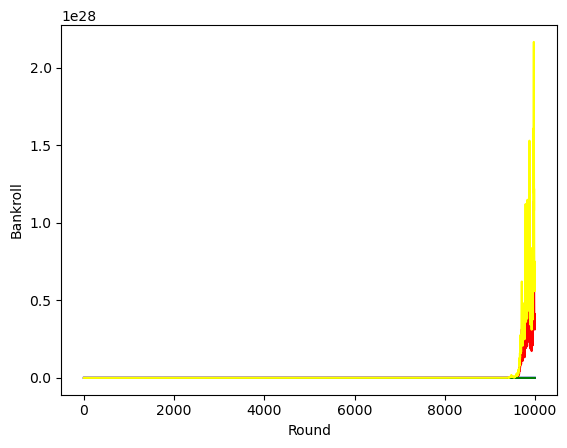

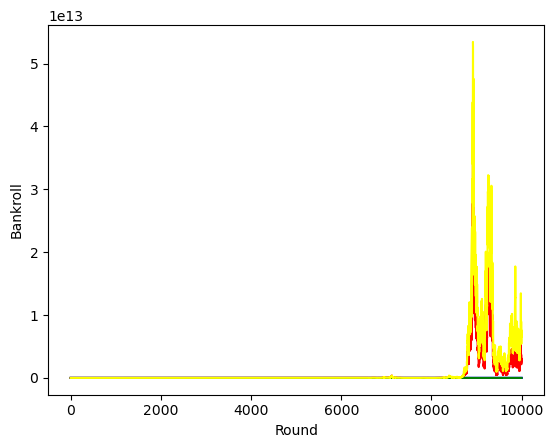

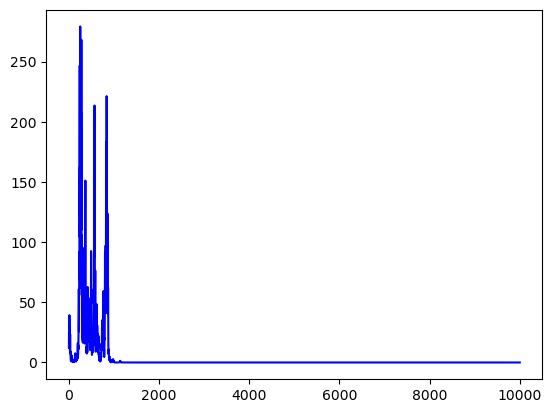

In [63]:
# initialize the number of simulation runs
num_tries = int(input('How many times would you like to run the simulation? '))

bankroll = float(input('How much money is in your bankroll? '))

print()
for seed in range(1, 26):
    full = full_kelly(num_tries, bankroll, seed)
    fractional = fractional_kelly(num_tries, bankroll, 0.55, 0.5, seed)
    blind = blind_kelly(num_tries, bankroll, seed)
    blind_fractional = blind_fractional_kelly(num_tries, bankroll, 0.5, seed)
    
    plt.ylabel('Bankroll')
    plt.xlabel('Round')
    plt.plot(full, label='Full Kelly', color='blue')
    plt.plot(fractional, label='Fractional Kelly', color='red')
    plt.plot(blind, label='Blind Kelly', color='green')
    plt.plot(blind_fractional, label='Blind Fractional Kelly', color='yellow')
plt.show()

plt.figure()

for seed in range(26, 51):
    full = full_kelly(num_tries, bankroll, seed)
    fractional = fractional_kelly(num_tries, bankroll, 0.55, 0.5, seed)
    blind = blind_kelly(num_tries, bankroll, seed)
    blind_fractional = blind_fractional_kelly(num_tries, bankroll, 0.5, seed)
    
    plt.ylabel('Bankroll')
    plt.xlabel('Round')
    plt.plot(full, label='Full Kelly', color='blue')
    plt.plot(fractional, label='Fractional Kelly', color='red')
    plt.plot(blind, label='Blind Kelly', color='green')
    plt.plot(blind_fractional, label='Blind Fractional Kelly', color='yellow')

    plt.figure()
    plt.plot(full, label='Full Kelly', color='blue', )